In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import numpy as np
import xarray as xr
from datetime import timedelta as delta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats

In [43]:
ds = xr.open_dataset("RRtunaFADPrey_no321_npart23_nfad2_T0.50_F1.00_P1.00_I0.01_p0.0_Pa0.1.nc")

In [44]:
ds

<xarray.Dataset>
Dimensions:     (trajectory: 23, obs: 21)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * trajectory  (trajectory) int64 0 1 2 3 4 5 6 7 8 ... 15 16 17 18 19 20 21 22
Data variables:
    FADkap      (trajectory, obs) float32 ...
    Sta         (trajectory, obs) float32 ...
    Stac        (trajectory, obs) float32 ...
    Stna        (trajectory, obs) float32 ...
    Stnac       (trajectory, obs) float32 ...
    caught      (trajectory, obs) float32 ...
    lat         (trajectory, obs) float32 ...
    lon         (trajectory, obs) float32 ...
    ptype       (trajectory) float64 ...
    time        (trajectory, obs) timedelta64[ns] ...
    z           (trajectory, obs) float32 ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           spherical
    parcels_version:        2.4.2

In [45]:
time0 = ds.isel(obs = 5)

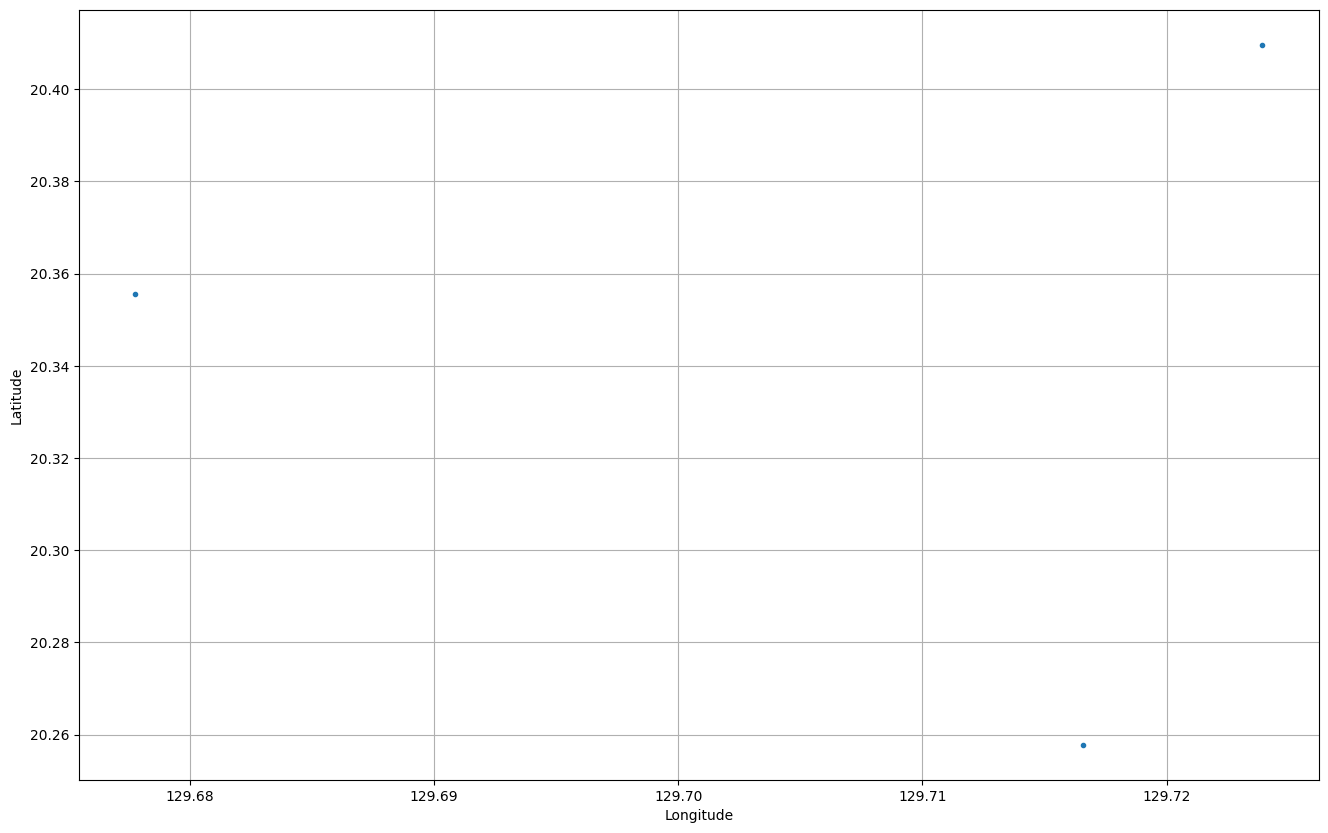

In [46]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(time0.lon.T, time0.lat.T, '.')

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.grid()

In [47]:
print(len(ds.lon.trajectory))

23


In [48]:
print("Longitude data in ds.lon:", ds.lon.values)
print("Latitude data in ds.lat:", ds.lat.values)

Longitude data in ds.lon: [[129.72392 129.72392 129.72392 129.72392 129.72392 129.72392 129.72392
  129.72392 129.72392 129.72392 129.72392 129.72392 129.72392 129.72392
  129.72392 129.72392 129.72392 129.72392 129.72392 129.72392 129.72392]
 [129.67776 129.67776 129.67776 129.67776 129.67776 129.67776 129.67776
  129.67776 129.67776 129.67776 129.67776 129.67776 129.67776 129.67776
  129.67776 129.67776 129.67776 129.67776 129.67776 129.67776 129.67776]
 [129.71657 129.71657 129.71657 129.71657 129.71657 129.71657 129.71657
  129.71657 129.71657 129.71657 129.71657 129.71657 129.71657 129.71657
  129.71657 129.71657 129.71657 129.71657 129.71657 129.71657 129.71657]
 [129.9004  129.9004        nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan]
 [129.6775  129.6775        nan       nan       nan       nan       nan
        nan       nan       nan   

In [49]:
import numpy as np

# Filter out NaN values before plotting
valid_lon = ds.lon.values[~np.isnan(ds.lon.values)]
valid_lat = ds.lat.values[~np.isnan(ds.lat.values)]

ax.plot(valid_lon.T, valid_lat.T, '.')

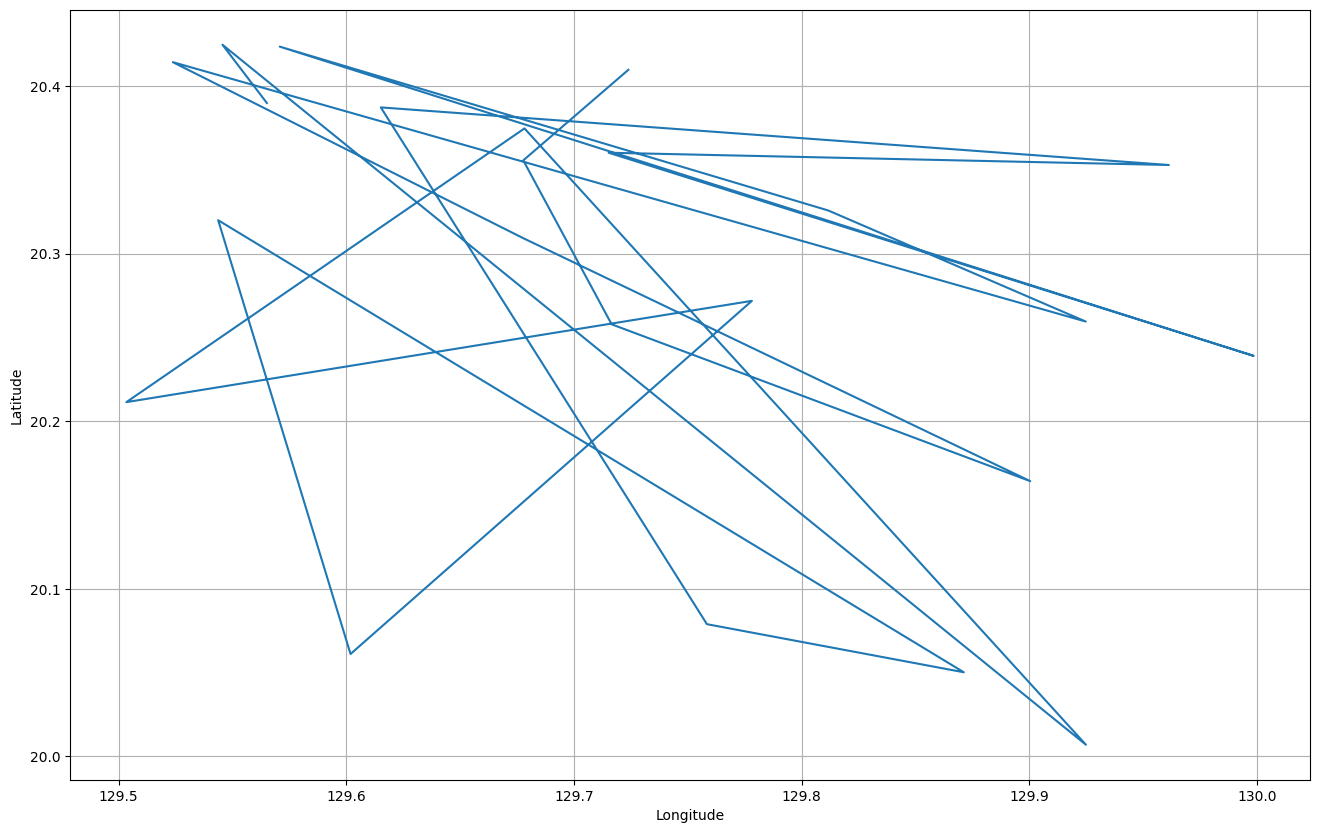

In [50]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(valid_lon.T, valid_lat.T)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid()

In [51]:
ds1 = xr.open_dataset("stcc_his_osu_subset_0001.nc")

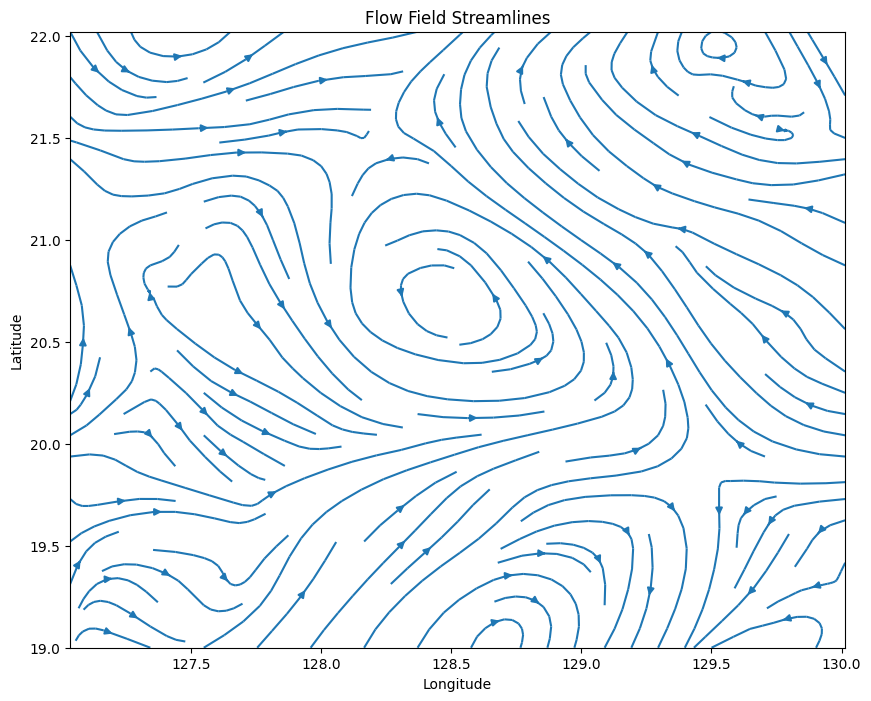

In [52]:
# Select the first time step and surface layer
u = ds1['u'].isel(ocean_time=0, s_rho=-1)
v = ds1['v'].isel(ocean_time=0, s_rho=-1)

# Use the corresponding grids for u and v
lon_u = ds1['lon_u']
lat_u = ds1['lat_u']

u_n = u[1:,:]
v_n = v[:,1:]
lon_u_n = lon_u[1:,:]
lat_u_n = lat_u[1:,:]

ax.plot(valid_lon.T, valid_lat.T)

# Ensure dimensions match between u, v, lon_u, and lat_u
plt.figure(figsize=(10, 8))
plt.streamplot(lon_u_n.values, lat_u_n.values, u_n.values, v_n.values)
plt.title('Flow Field Streamlines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


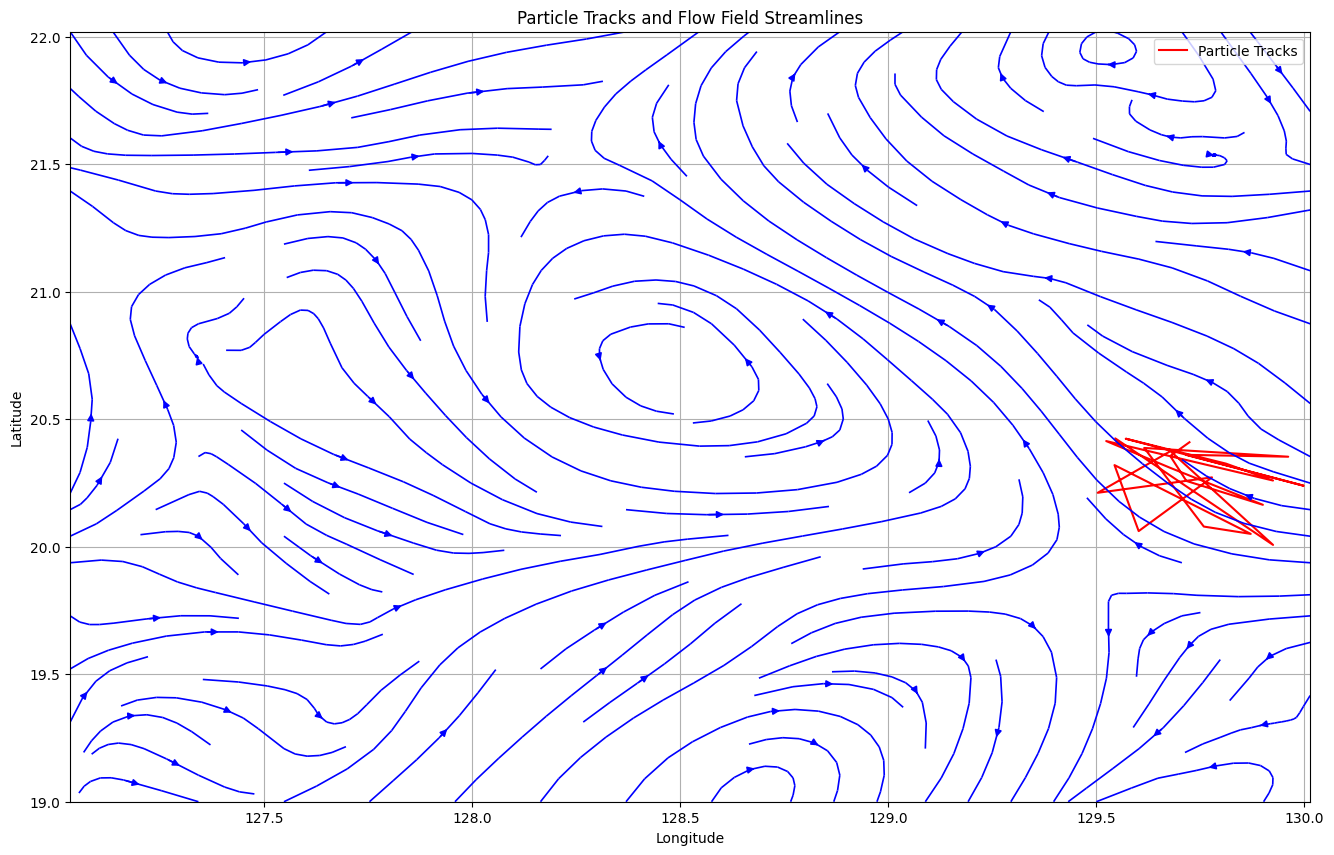

In [53]:
fig, ax = plt.subplots(figsize=(16, 10))

# Plot the particle tracks
ax.plot(valid_lon.T, valid_lat.T, color='red', label='Particle Tracks')

# Select the first time step and surface layer
u = ds1['u'].isel(ocean_time=0, s_rho=-1)
v = ds1['v'].isel(ocean_time=0, s_rho=-1)

# Use the corresponding grids for u and v
lon_u = ds1['lon_u']
lat_u = ds1['lat_u']

# Ensure dimensions match
u_n = u[1:, :]
v_n = v[:, 1:]
lon_u_n = lon_u[1:, :]
lat_u_n = lat_u[1:, :]

# Overlay the streamlines
strm = ax.streamplot(lon_u_n.values, lat_u_n.values, u_n.values, v_n.values, color='blue', density=1, linewidth=1.2)

# Add labels, grid, and legend
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Particle Tracks and Flow Field Streamlines")
ax.grid()
ax.legend(loc='upper right')

# Show the plot
plt.show()
